In [1]:
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Build Some Nonlinear Data

In [2]:
fun = lambda x: np.sin(x) + 0.01 * x * x

X = np.linspace(-3, 3, 100)
y = fun(X)

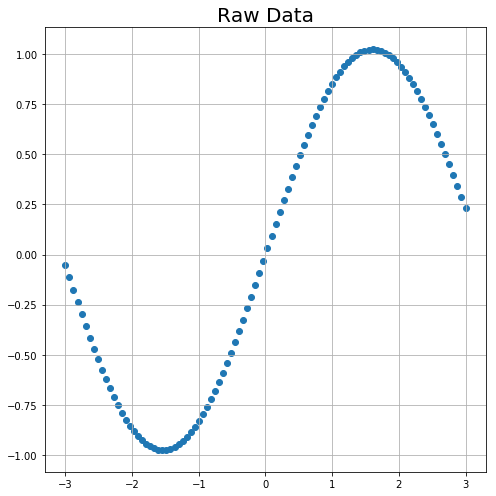

In [3]:
plt.figure(figsize=(7,7))

plt.scatter(X,y)

plt.title('Raw Data', fontsize=20)
plt.tight_layout()
plt.grid()
plt.show()

# Define a Neural Network

In [4]:
class FirstNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FirstNet, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        x = x.view(-1,1)
        
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        
        return out

In [5]:
net = FirstNet(input_size=1, hidden_size=64, num_classes=1)

print(net)

FirstNet(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)


# Make Predictions Before Training the Network

In [6]:
preds = net.forward(torch.FloatTensor(X)).detach().numpy()

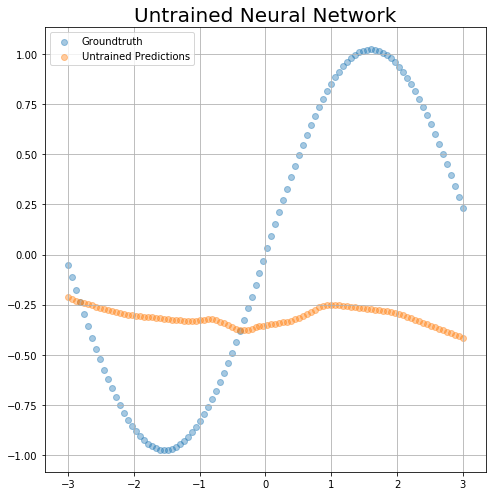

In [7]:
plt.figure(figsize=(7,7))

plt.scatter(X,y, label='Groundtruth', alpha=0.4)
plt.scatter(X, preds, label='Untrained Predictions', alpha=0.4)

plt.title('Untrained Neural Network', fontsize=20)

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# Train the Neural Network

In [8]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    net = net.cuda()

In [9]:
learning_rate = 0.01
num_epochs = 2000

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [11]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).view(-1,1)

In [12]:
if use_cuda:
    X = X.cuda()
    y = y.cuda()

In [13]:
for epoch in range(num_epochs):
    pred = net.forward(X)
    loss = criterion(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch % 500 == 99):
        print("Epoch: {:>4} Loss: {}".format(epoch, loss.data[0]))

Epoch:   99 Loss: 0.06652382761240005


/home/gram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.


Epoch:  599 Loss: 0.01002530474215746
Epoch: 1099 Loss: 0.006583415437489748
Epoch: 1599 Loss: 0.00475440826267004


# Make Predictions Using the Trained Network

In [14]:
X_test = np.linspace(-3, 3, 200)
preds = net.forward(torch.FloatTensor(X_test)).detach().numpy()

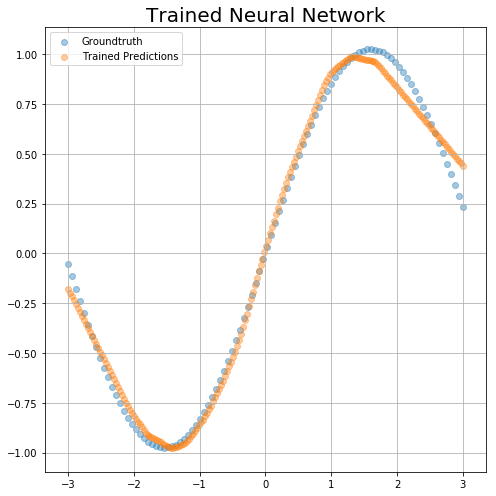

In [15]:
plt.figure(figsize=(7,7))

plt.scatter(X, y, label='Groundtruth', alpha=0.4)
plt.scatter(X_test, preds, label='Trained Predictions', alpha=0.4)

plt.title('Trained Neural Network', fontsize=20)

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

The plot above shows intradomain unseen values.

The plot below shows extradomain unseen values, too. Why is that important?

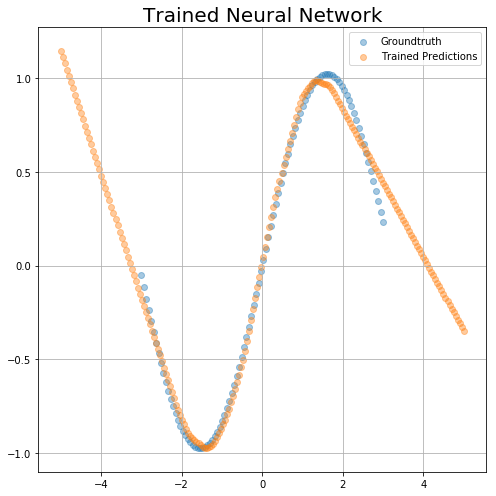

In [16]:
X_test = np.linspace(-5, 5, 200)
preds = net.forward(torch.FloatTensor(X_test)).detach().numpy()

plt.figure(figsize=(7,7))

plt.scatter(X, y, label='Groundtruth', alpha=0.4)
plt.scatter(X_test, preds, label='Trained Predictions', alpha=0.4)

plt.title('Trained Neural Network', fontsize=20)

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# Accuracy Testing

In [17]:
X_test = np.linspace(-3, 3, 100)
preds = net.forward(torch.FloatTensor(X_test)).detach().numpy()

In [18]:
residuals = np.zeros(preds.shape[0])

for i in range(preds.shape[0]):
    residuals[i] = y[i].detach().numpy() - preds[i]

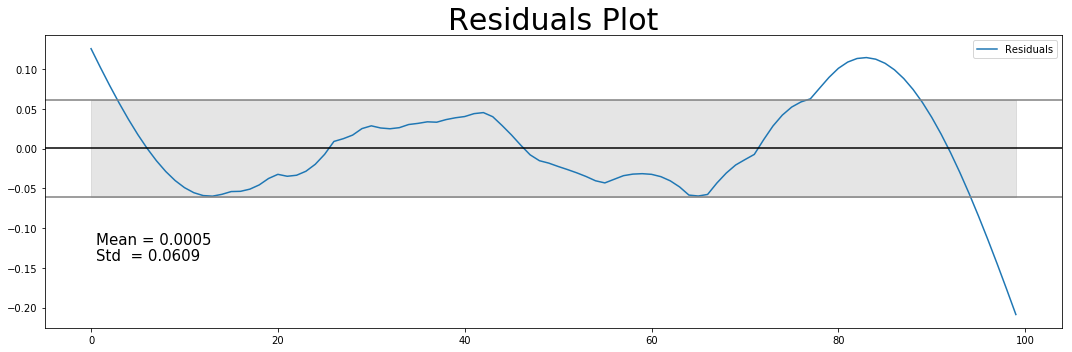

In [19]:
plt.figure(figsize=(15,5))

plt.plot(residuals, label='Residuals')
plt.axhline(y=np.mean(residuals), color='k')
plt.axhline(y=np.mean(residuals)-np.std(residuals), color='grey')
plt.axhline(y=np.mean(residuals)+np.std(residuals), color='grey')

plt.fill_between(x=range(y.shape[0]), y1=np.mean(residuals)+np.std(residuals), 
                 y2=np.mean(residuals)-np.std(residuals), 
                 alpha=0.2, color='grey')

plt.text(0.5, -0.12, 'Mean = {}'.format(np.mean(residuals).round(4)), fontsize=15)
plt.text(0.5, -0.14, 'Std  = {}'.format(np.std(residuals).round(4)), fontsize=15)
     
plt.title('Residuals Plot', fontsize=30)
plt.tight_layout()
plt.legend()
plt.show()